In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
#load Agriculture data using Han's code as 'agr'
file = pd.read_csv('./test/merged.csv')
agr = file.drop(['Unnamed: 0'], axis=1)

## save downloaded origin file 
#agr.to_csv('./agriculture_origin.csv', index=False)
agr

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,ARG,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,120000.0,130000.000000,140000.000000,150000.000000,155000.000000,160000.000000,165000.000000,170000.000000,175000.000000,168350.000000,171000.000000,174660.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,173000.000000,171400.000000,166700.000000,213000.000000,203700.000000,201800.000000,203700.000000,204000.000000,225000.000000,245000.000000,267782.0,266100.000000,264500.000000,262850.000000,261200.000000,259500.000000,257800.000000,256100.000000,254400.000000,252700.000000,251000.000000,249300.000000,247600.000000,245900.000000,244320.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belize,BLZ,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,211.0,269.000000,314.000000,402.000000,400.000000,450.000000,500.000000,525.000000,550.000000,573.000000,596.000000,619.000000,642.000000,665.000000,688.000000,710.000000,734.000000,757.000000,780.000000,803.000000,825.000000,845.000000,870.000000,893.000000,940.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bolivia,BOL,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,1300.0,1400.000000,1500.000000,1600.000000,1700.000000,1800.000000,1900.000000,2000.000000,2100.000000,2200.000000,2300.000000,2400.000000,2600.000000,2800.000000,3000.000000,3200.000000,3400.000000,3600.000000,3800.000000,4000.000000,4200.000000,4400.000000,4500.000000,4600.000000,4750.000000,4900.000000,5000.000000,5100.0,5100.000000,5200.000000,5300.000000,5350.000000,5350.000000,5350.000000,5500.000000,5600.000000,5700.000000,5700.000000,5700.000000,6000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,BRA,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,72000.0,82000.000000,93000.000000,103000.000000,114000.000000,124000.000000,134500.000000,145000.000000,155400.000000,165870.000000,183500.000000,201000.000000,218500.000000,236000.000000,323113.000000,350000.000000,370000.000000,428000.000000,485000.000000,545205.000000,569000.000000,593000.000000,617000.000000,641000.000000,666309.000000,678803.000000,691297.000000,703790.0,716285.000000,728779.000000,741272.000000,753766.000000,766260.000000,778754.000000,791248.000000,803742.000000,802173.000000,800604.000000,799035.000000,797466.000000,795898.000000,794329.000000,792760.000000,791191.000000,789622.000000,788053.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chile,CHL,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,NaN,33550.0,33600.000000,33650.000000,33700.000000,33750.000000,33800.000000,33850.000000,33900.000000,33950.000000,34000.000000,34050.000000,34100.000000,34150.000000,34200.000000,34300.000000,34407.000000,34400.000000,34395.000000,34385.000000,34380.000000,34370.000000,34365.000000,34360.000000,34350.000000,34340.000000,37920.000000,41270.000000,37450.0,36620.000000,35750.000000,37570.000000,39900.000000,41710.000000,41312.000000,43201.000000,44265.000000,53710.000000,53730.000000,53750.000000,53770.000000,53790.000000,53810.000000,53830.000000,53850.000000,53870.000000,53890.000000,53915.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Peru,PER,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,NaN,NaN,19.

In [3]:
origin_series_code=list(agr['Series_Code'].unique())
origin_series_name=list(agr['Series_Name'].unique())
origin_series = pd.DataFrame({'Series Code': origin_series_code,'Series Name': origin_series_name})
origin_series
#origin_series.to_csv('./agriculture_series.csv', index=False)

,Series Code,Series Name
0,AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
1,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...
2,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...
3,AG.LND.AGRI.K2,Agricultural land (sq. km)
4,AG.LND.AGRI.ZS,Agricultural land (% of land area)
5,AG.LND.ARBL.HA,Arable land (hectares)
6,AG.LND.ARBL.HA.PC,Arable land (hectares per person)
7,AG.LND.ARBL.ZS,Arable land (% of land area)
8,AG.LND.CREL.HA,Land under cereal production (hectares)
9,AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [4]:
## rename manually in Excel
New_Series_Info = pd.read_csv('./agriculture_series_new.csv')
New_Series_Info

,Series Code,Series Name,New Series Name
0,AG.AGR.TRAC.NO,"Agricultural machinery, tractors",Tractors_num
1,AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,FertilizerCons_pctFertilizerProd
2,AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,FertilizerCons_kgHec
3,AG.LND.AGRI.K2,Agricultural land (sq. km),AgriLand_sqkm
4,AG.LND.AGRI.ZS,Agricultural land (% of land area),AgrilLand_pctLand
5,AG.LND.ARBL.HA,Arable land (hectares),ArableLand_hec
6,AG.LND.ARBL.HA.PC,Arable land (hectares per person),ArableLand_hecPerson
7,AG.LND.ARBL.ZS,Arable land (% of land area),ArableLand_pctLand
8,AG.LND.CREL.HA,Land under cereal production (hectares),LandCerealProd_pctLand
9,AG.LND.CROP.ZS,Permanent cropland (% of land area),PermanentCropLand_pctLand


In [5]:
## apply new name to Series in dataframe
for code, newName in zip(New_Series_Info['Series Code'], New_Series_Info['New Series Name']):
    agr.loc[agr.Series_Code == code, 'Series_Name'] = newName

In [6]:
agr
#agr.to_csv('./agriculture_cleaned.csv', index=False)

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,ARG,Tractors_num,AG.AGR.TRAC.NO,NaN,120000.0,130000.000000,140000.000000,150000.000000,155000.000000,160000.000000,165000.000000,170000.000000,175000.000000,168350.000000,171000.000000,174660.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,173000.000000,171400.000000,166700.000000,213000.000000,203700.000000,201800.000000,203700.000000,204000.000000,225000.000000,245000.000000,267782.0,266100.000000,264500.000000,262850.000000,261200.000000,259500.000000,257800.000000,256100.000000,254400.000000,252700.000000,251000.000000,249300.000000,247600.000000,245900.000000,244320.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Belize,BLZ,Tractors_num,AG.AGR.TRAC.NO,NaN,211.0,269.000000,314.000000,402.000000,400.000000,450.000000,500.000000,525.000000,550.000000,573.000000,596.000000,619.000000,642.000000,665.000000,688.000000,710.000000,734.000000,757.000000,780.000000,803.000000,825.000000,845.000000,870.000000,893.000000,940.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bolivia,BOL,Tractors_num,AG.AGR.TRAC.NO,NaN,1300.0,1400.000000,1500.000000,1600.000000,1700.000000,1800.000000,1900.000000,2000.000000,2100.000000,2200.000000,2300.000000,2400.000000,2600.000000,2800.000000,3000.000000,3200.000000,3400.000000,3600.000000,3800.000000,4000.000000,4200.000000,4400.000000,4500.000000,4600.000000,4750.000000,4900.000000,5000.000000,5100.0,5100.000000,5200.000000,5300.000000,5350.000000,5350.000000,5350.000000,5500.000000,5600.000000,5700.000000,5700.000000,5700.000000,6000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,BRA,Tractors_num,AG.AGR.TRAC.NO,NaN,72000.0,82000.000000,93000.000000,103000.000000,114000.000000,124000.000000,134500.000000,145000.000000,155400.000000,165870.000000,183500.000000,201000.000000,218500.000000,236000.000000,323113.000000,350000.000000,370000.000000,428000.000000,485000.000000,545205.000000,569000.000000,593000.000000,617000.000000,641000.000000,666309.000000,678803.000000,691297.000000,703790.0,716285.000000,728779.000000,741272.000000,753766.000000,766260.000000,778754.000000,791248.000000,803742.000000,802173.000000,800604.000000,799035.000000,797466.000000,795898.000000,794329.000000,792760.000000,791191.000000,789622.000000,788053.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chile,CHL,Tractors_num,AG.AGR.TRAC.NO,NaN,33550.0,33600.000000,33650.000000,33700.000000,33750.000000,33800.000000,33850.000000,33900.000000,33950.000000,34000.000000,34050.000000,34100.000000,34150.000000,34200.000000,34300.000000,34407.000000,34400.000000,34395.000000,34385.000000,34380.000000,34370.000000,34365.000000,34360.000000,34350.000000,34340.000000,37920.000000,41270.000000,37450.0,36620.000000,35750.000000,37570.000000,39900.000000,41710.000000,41312.000000,43201.000000,44265.000000,53710.000000,53730.000000,53750.000000,53770.000000,53790.000000,53810.000000,53830.000000,53850.000000,53870.000000,53890.000000,53915.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,Peru,PER,AgriMaterialExport_pctExports,TX.VAL.AGRI.ZS.UN,NaN,NaN,19.950460,19.955270,16.299811,15.324927,13.058102,8.932401,7.965783,9.021404,5.886149,5.881586,6.488115,8.273895,7.758861,6.060873,8.

## Explore Korea Data

In [7]:
korea_data = agr.loc[agr['Country_Code']=="KOR"]
korea_data

,Country_Name,Country_Code,Series_Name,Series_Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
12,"Korea, Rep.",KOR,Tractors_num,AG.AGR.TRAC.NO,NaN,2.400000e+01,2.400000e+01,2.400000e+01,3.000000e+01,3.500000e+01,4.000000e+01,3.400000e+01,6.800000e+01,1.000000e+02,6.100000e+01,1.830000e+02,2.120000e+02,2.930000e+02,3.880000e+02,5.640000e+02,7.900000e+02,1.121000e+03,1.601000e+03,2.035000e+03,2.664000e+03,3.862000e+03,5.575000e+03,7.649000e+03,9.684000e+03,1.238900e+04,1.616700e+04,1.986300e+04,2.461600e+04,3.132800e+04,4.120300e+04,5.297300e+04,6.415900e+04,7.680000e+04,8.870600e+04,1.004120e+05,1.132870e+05,1.313580e+05,1.578880e+05,1.761460e+05,1.916310e+05,2.010890e+05,2.063710e+05,2.115760e+05,2.196640e+05,2.278730e+05,2.367070e+05,2.436620e+05,2.535310e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,"Korea, Rep.",KOR,FertilizerCons_pctFertilizerProd,AG.CON.FERT.PT.ZS,NaN,8.681350e+02,8.289474e+02,9.095863e+02,5.556288e+02,4.486393e+02,4.341488e+02,2.772028e+02,1.130844e+02,1.043100e+02,1.042218e+02,1.101860e+02,1.121562e+02,1.248300e+02,1.248922e+02,1.123294e+02,8.575697e+01,8.021467e+01,7.638812e+01,6.675519e+01,6.791695e+01,7.767515e+01,5.779221e+01,6.914627e+01,6.781419e+01,7.108997e+01,7.501955e+01,8.192029e+01,7.791406e+01,9.143162e+01,8.492397e+01,9.816931e+01,9.221127e+01,9.191052e+01,8.602151e+01,9.431879e+01,8.478610e+01,8.755516e+01,9.164905e+01,8.384116e+01,8.319875e+01,8.069417e+01,8.237530e+01,1.059063e+02,1.058653e+02,1.065243e+02,1.021874e+02,1.188991e+02,9.647525e+01,1.252249e+02,1.069050e+02,1.180168e+02,2.583868e+02,1.552698e+02,2.097758e+02,2.424525e+02,1.920335e+02,1.611651e+02,1.679037e+02,NaN,NaN
54,"Korea, Rep.",KOR,FertilizerCons_kgHec,AG.CON.FERT.ZS,NaN,1.554914e+02,1.576577e+02,1.720657e+02,1.724974e+02,1.555552e+02,1.935386e+02,2.215351e+02,2.200828e+02,2.479541e+02,2.614501e+02,2.803187e+02,3.078432e+02,3.613814e+02,4.088641e+02,4.199408e+02,3.122636e+02,3.561345e+02,4.189038e+02,4.113765e+02,3.898301e+02,3.748176e+02,2.997072e+02,3.531496e+02,3.857709e+02,4.165256e+02,4.308383e+02,4.506228e+02,4.612419e+02,4.944611e+02,4.903748e+02,4.814219e+02,5.077450e+02,5.193067e+02,5.203252e+02,5.490909e+02,5.208636e+02,5.760743e+02,5.076112e+02,4.832755e+02,4.559587e+02,4.242765e+02,4.179699e+02,4.270466e+02,4.531961e+02,4.781520e+02,3.337393e+02,4.062500e+02,3.044803e+02,3.386104e+02,3.302821e+02,3.373189e+02,3.518257e+02,3.446959e+02,3.459229e+02,3.378128e+02,3.535626e+02,3.559974e+02,3.697358e+02,NaN,NaN
75,"Korea, Rep.",KOR,AgriLand_sqkm,AG.LND.AGRI.K2,NaN,2.113000e+04,2.081000e+04,2.100000e+04,2.191000e+04,2.278000e+04,2.315000e+04,2.336000e+04,2.343000e+04,2.337000e+04,2.324000e+04,2.299000e+04,2.270000e+04,2.271000e+04,2.268000e+04,2.272000e+04,2.270000e+04,2.267000e+04,2.263000e+04,2.252000e+04,2.247000e+04,2.245000e+04,2.243000e+04,2.236000e+04,2.229000e+04,2.220000e+04,2.217000e+04,2.219000e+04,2.214000e+04,2.197000e+04,2.179000e+04,2.161000e+04,2.136000e+04,2.118000e+04,2.096000e+04,2.048000e+04,2.008000e+04,1.983000e+04,1.969000e+04,1.954000e+04,1.973000e+04,1.945000e+04,1.919000e+04,1.902000e+04,1.893000e+04,1.881000e+04,1.858000e+04,1.840000e+04,1.817000e+04,1.795000e+04,1.773000e+04,1.756100e+04,1.788000e+04,1.768700e+04,1.748300e+04,1.736000e+04,1.700800e+04,1.676700e+04,1.652000e+04,NaN,NaN
96,"Korea, Rep.",KOR,AgrilLand_pctLand,AG.LND.AGRI.ZS,NaN,2.190545e+01,2.157371e+01,2.177068e+01,2.271408e+01,2.361601e+01,2.399959e+01,2.421729e+01,2.428986e+01,2.422766e+01,2.409289e+01,2.383371e+01,2.353307e+01,2.354344e+01,2.351234e+01,2.355380e+01,2.353307e+01,2.350197e+01,2.346050e+01,2.334646e+01,2.329463e+01,2.327390e+01,2.325316e+01,2.318059e+01,2.310802e+01,2.301472e+01,2.298362e+01,2.300435e+01,2.295252e+01,2.277628e+01,2.25896

In [8]:
# Drop non essential columns
korea_data.drop(['Series_Code', 'Country_Code', 'Country_Name'], axis=1, inplace=True)
# Reset index to allow for easy Transpose
korea_data.set_index('Series_Name', inplace=True)
tkorea_data = korea_data.T

C:\ProgramData\anaconda\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
tkorea_data

Series_Name,Tractors_num,FertilizerCons_pctFertilizerProd,FertilizerCons_kgHec,AgriLand_sqkm,AgrilLand_pctLand,ArableLand_hec,ArableLand_hecPerson,ArableLand_pctLand,LandCerealProd_pctLand,PermanentCropLand_pctLand,RuralLandBel5_sqkm,RuralLandBel5_pctLand,Forest_sqkm,Forest_pctLand,IrrigatedLand_pctAgriLand,PercipiAvg_mmYear,Land_sqkm,RuralLand_sqkm,TractorsPer100sqkm_num,CerealProd_mton,CropProd_20146,FoodProd_20146,LivestockProd_20146,SurfaceArea_sqkm,CerealYield_kgHec,RuralElectricity_pctRuralPop,AgriCH4Emit_mton,AgriCH4Emit_pctTotEmit,AgriN2OEmit_mton,AgriN2OEmit_pctTotEmit,RuralPopBel5_pctTotPop,FreshwaterAgri_pctTotFreshwater,AFF_USD,AFF_pctGDP,FemaleEmpAgri_pctFemaleEmp,MaleEmpAgri_pctMaleEmp,EmpAgri_pctEmp,RuralPop_num,RuralPopGrowth_pctAnnual,RuralPop_pctTotPop,AgriMaterialImport_pctImports,AgriMaterialExport_pctExports
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.447133e+09,36.560474,NaN,NaN,NaN,18081445.0,NaN,72.290,NaN,NaN
1961,24.0,868.135007,155.491392,21130.0,21.905453,2033000.0,0.078903,21.076094,2073629.0,0.642753,NaN,NaN,NaN,NaN,NaN,NaN,96460.0,NaN,0.118052,6629757.0,43.78,24.38,4.66,99260.0,3197.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.351621e+08,38.682091,NaN,NaN,NaN,18414469.0,1.825044,71.469,NaN,NaN
1962,24.0,828.947368,157.657658,20810.0,21.573709,1998000.0,0.075359,20.713249,2112667.0,0.673854,NaN,NaN,NaN,NaN,NaN,1274.0,96460.0,NaN,0.120120,5902917.0,41.62,23.02,4.31,99260.0,2794.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.031004e+09,36.634232,NaN,NaN,NaN,18702026.0,1.549515,70.539,22.169094,13.353641
1963,24.0,909.586303,172.065672,21000.0,21.770682,2010000.0,0.073730,20.837653,2178119.0,0.725689,NaN,NaN,NaN,NaN,NaN,NaN,96460.0,NaN,0.119403,6377585.0,45.25,25.58,5.57,99260.0,2928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.719314e+09,43.103714,NaN,NaN,NaN,18972268.0,1.434647,69.593,17.491083,16.390062
1964,30.0,555.628813,172.497370,21910.0,22.714078,2091000.0,0.074721,21.677379,2271775.0,0.829359,NaN,NaN,NaN,NaN,NaN,NaN,96460.0,NaN,0.143472,7380506.0,54.36,30.55,6.65,99260.0,3248.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.609336e+09,46.526876,NaN,NaN,NaN,19204966.0,1.219056,68.628,21.668106,11.349566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,NaN,192.033539,353.562639,17008.0,17.446071,1421000.0,0.027744,14.576003,858441.0,2.287438,NaN,NaN,63250.0,64.879115,NaN,NaN,97489.0,NaN,NaN,5831148.0,96.83,98.33,99.93,100339.0,6792.7,100.0,9210.0,NaN,4760.0,NaN,NaN,NaN,2.788760e+10,1.859035,4.99,4.91,4.94,9443539.0,0.788121,18.438,1.582048,0.856373
2017,NaN,161.165096,355.997415,16767.0,17.195159,1396700.0,0.027193,14.323659,821774.0,2.297200,NaN,NaN,63170.0,64.783099,NaN,1274.0,97510.0,NaN,NaN,5486957.0,96.00,97.50,99.08,100360.0,6677.0,100.0,9200.0,NaN,4780.0,NaN,NaN,58.932132,3.005446e+10,1.850756,4.77,5.04,4.92,9500413.0,0.600447,18.497,1.410101,0.928673
2018,NaN,167.903747,369.735844,16520.0,16.940115,1374000.0,0.026624,14.089418,824441.0,2.276456,NaN,NaN,63070.0,64.673913,NaN,NaN,97520.0,NaN,NaN,5428929.0,96.89,100.71,104.70,100370.0,6585.0,100.0,9290.0,NaN,4880.0,NaN,NaN,NaN,3.012276e+10,1.746403,4.74,5.18,5.00,9568386.0,0.712927,18.541,1.366635,0.948203
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62970.0,64.571370,NaN,NaN,97520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,2.754459e+10,1.667931,4.83,5.37,5.14,9602379.0,0.354634,18.570,1.247891,0.928356


<ipython-input-10-47c3670dc775>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


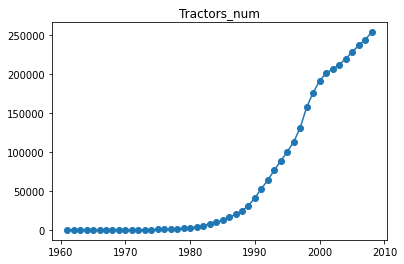

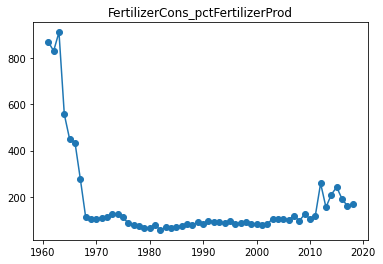

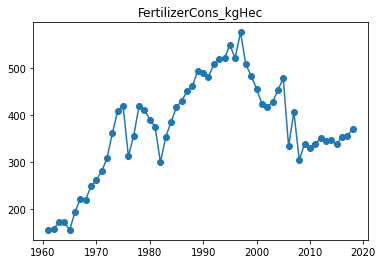

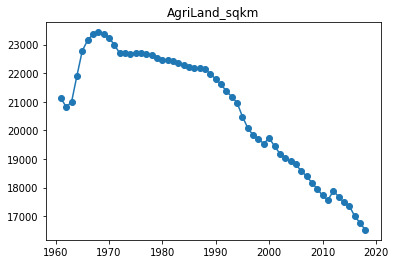

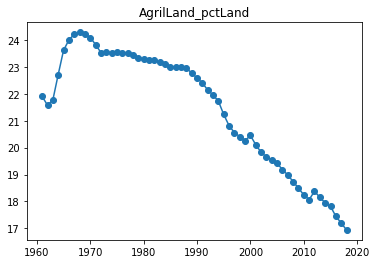

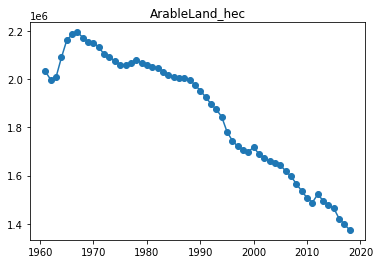

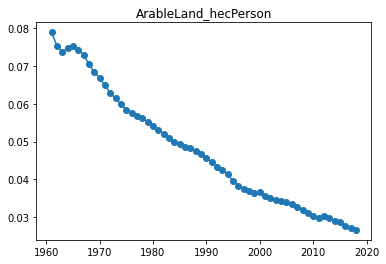

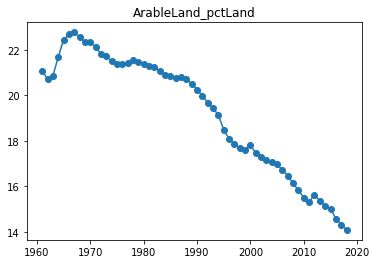

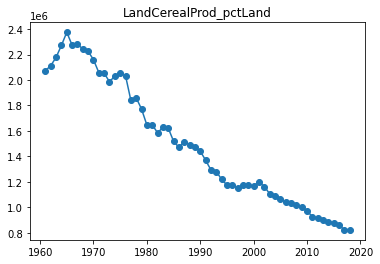

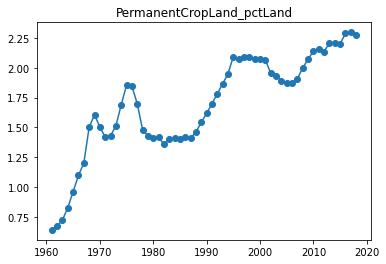

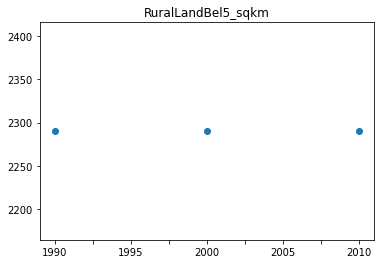

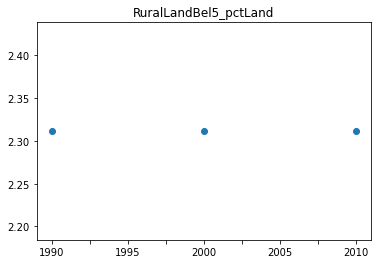

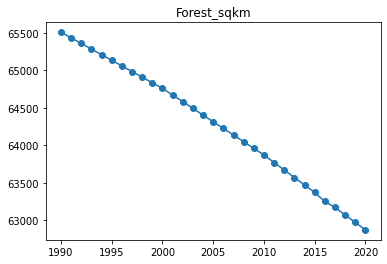

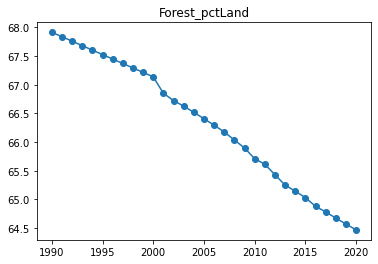

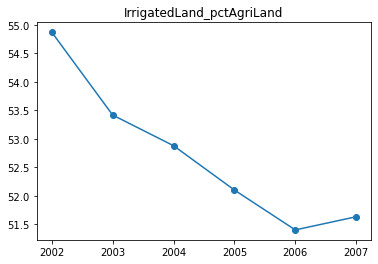

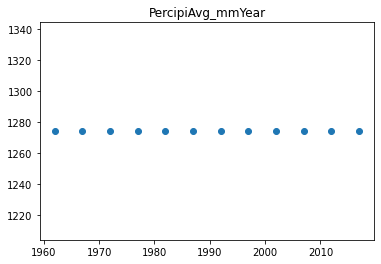

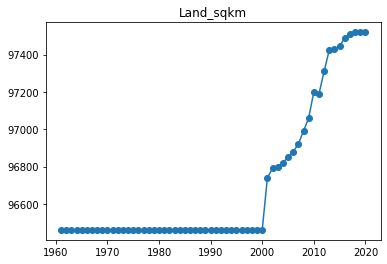

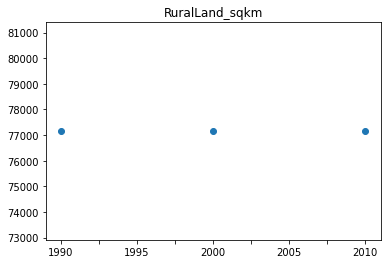

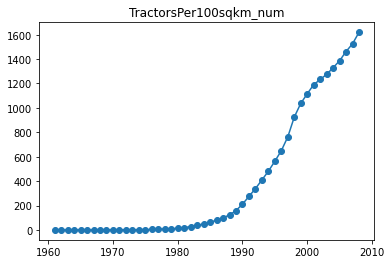

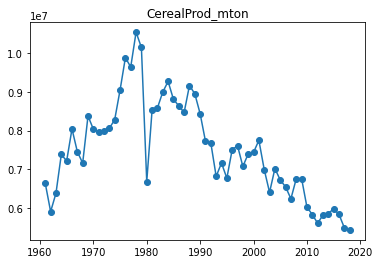

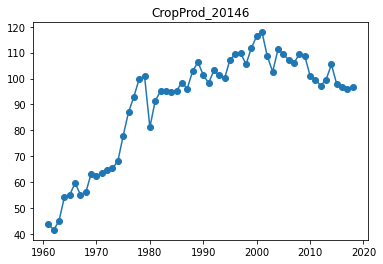

In [10]:
columns = list(tkorea_data.columns)
for col in columns[:21]:
    fig, ax = plt.subplots()
    tkorea_data[col].plot(ax=ax, title=col,marker = 'o')

<ipython-input-11-7555e5517c4c>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


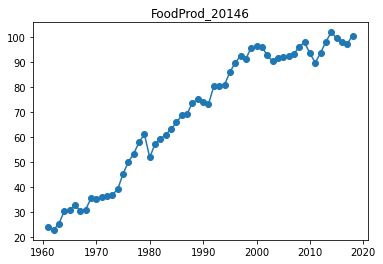

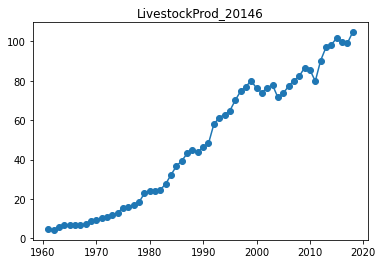

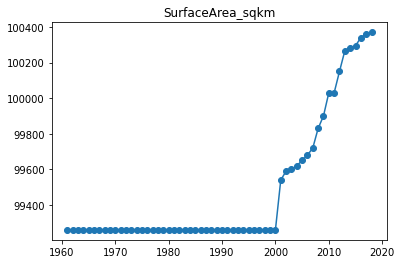

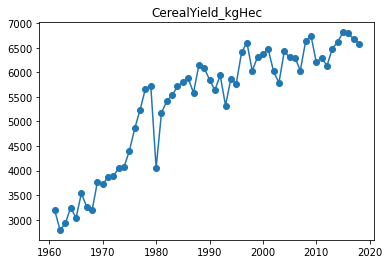

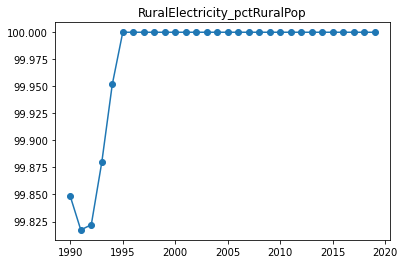

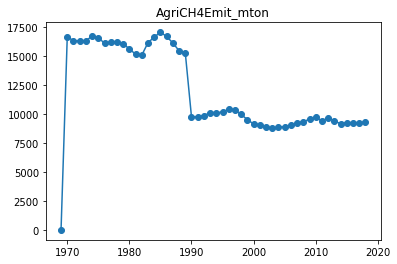

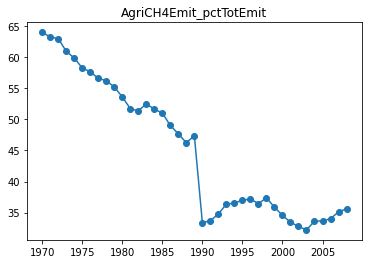

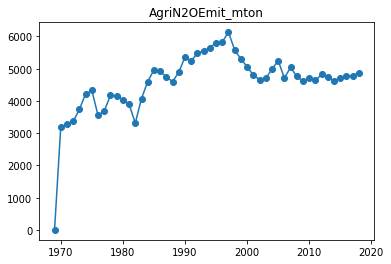

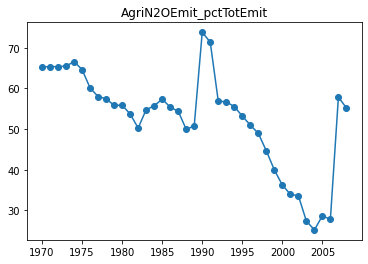

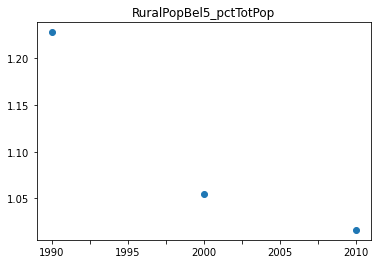

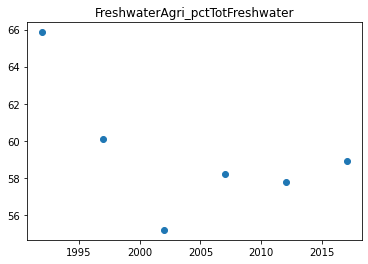

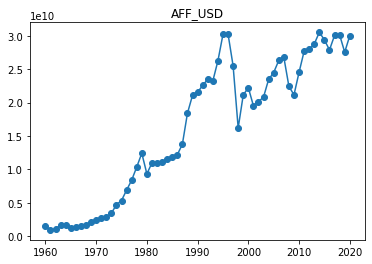

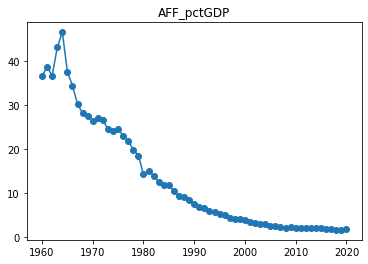

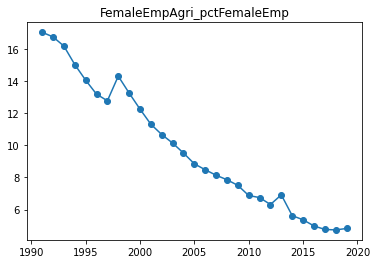

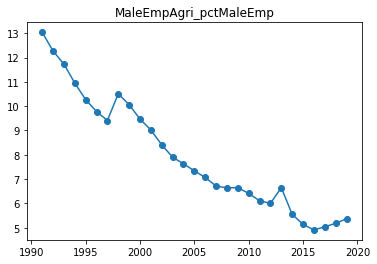

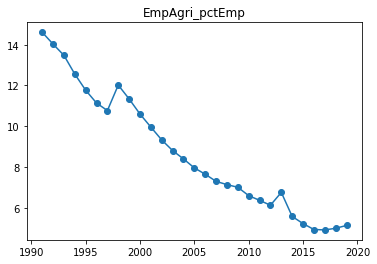

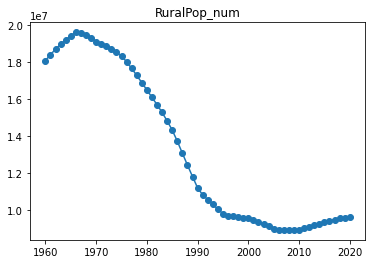

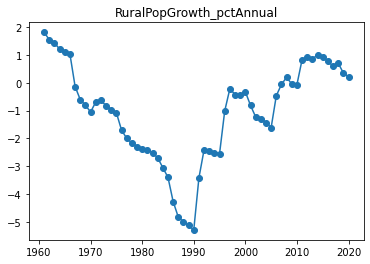

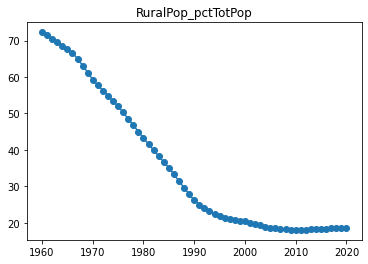

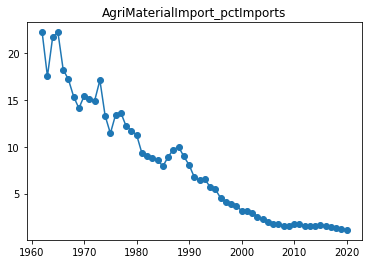

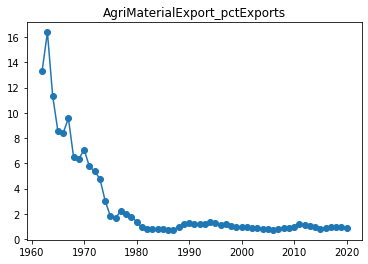

In [11]:
for col in columns[21:]:
    fig, ax = plt.subplots()
    tkorea_data[col].plot(ax=ax, title=col,marker = 'o')

In [4]:
# ## drop useless series
# valid_code = [
# 'BX.GRT.EXTA.CD.WD', 'BX.GRT.TECH.CD.WD', 'DC.DAC.TOTL.CD', 'DT.ODA.ALLD.CD', 'DT.ODA.ALLD.KD',
#  'DT.ODA.OATL.CD', 'DT.ODA.OATL.KD', 'DT.ODA.ODAT.CD', 'DT.ODA.ODAT.GI.ZS',
#  'DT.ODA.ODAT.GN.ZS', 'DT.ODA.ODAT.KD', 'DT.ODA.ODAT.MP.ZS', 'DT.ODA.ODAT.PC.ZS',
#  'DT.ODA.ODAT.XP.ZS', 'SE.ENR.PRSC.FM.ZS', 'SE.PRM.CMPT.ZS','SH.DYN.AIDS.ZS',
#  'SH.DYN.MORT', 'SH.STA.ANVC.ZS', 'SH.STA.MMRT', 'SH.STA.STNT.ZS',
#  'SH.TBS.INCD', 'SI.DST.FRST.20', 'SI.POV.DDAY', 'SL.EMP.VULN.ZS', 'SM.POP.NETM']
# list_of_df = []
# for code in valid_code:
#     tmp_df = agr[agr['Series_Code']==code]
#     list_of_df.append(tmp_df)
# agr_df = pd.concat(list_of_df,ignore_index=True)

In [7]:
# ## rename series
# new_series_name = ['GrantsExTech_USD', 'GrantsTech_USD', 'NetBiDAC_USD', 'ODAOA_USD',
# 'ODAOA_2018USD','OA_USD','OA_2018USD','ODA_USD','ODA_GCF','ODA_GNI','ODA_2018USD', 'ODA_PctImport',
# 'PerCapita_ODA_USD', 'ODA_pctGov', 'School12_GPI','School1End_pct', 'HIV_pctPOP1549', 'MortalRate5_1000Birth',
# 'PrenatalCare_pct', 'MatenalMortalRate_100KBirth','Stunting_pctChild5',
# 'Tuberculosis_100Kpop','IncomeLow20','Poverty19_2011PPP','VulEmploy_PctEmp','Migration']
# New_name = pd.Series(new_series_name, name='New Name')
# New_Series_Info = pd.concat([origin_series, New_name], axis=1)
# New_Series_Info

,Series Code,Series Name,New Name
0,NaN,NaN,GrantsExTech_USD
1,NaN,NaN,GrantsTech_USD
2,NaN,NaN,NetBiDAC_USD
3,NaN,NaN,ODAOA_USD
4,NaN,NaN,ODAOA_2018USD
5,NaN,NaN,OA_USD
6,NaN,NaN,OA_2018USD
7,NaN,NaN,ODA_USD
8,NaN,NaN,ODA_GCF
9,NaN,NaN,ODA_GNI
